In [3]:
!pip install tensorflow numpy


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [5]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [6]:
img_width = 180
img_height =180 

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [8]:
data_cat = data_train.class_names

In [9]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [10]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [11]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


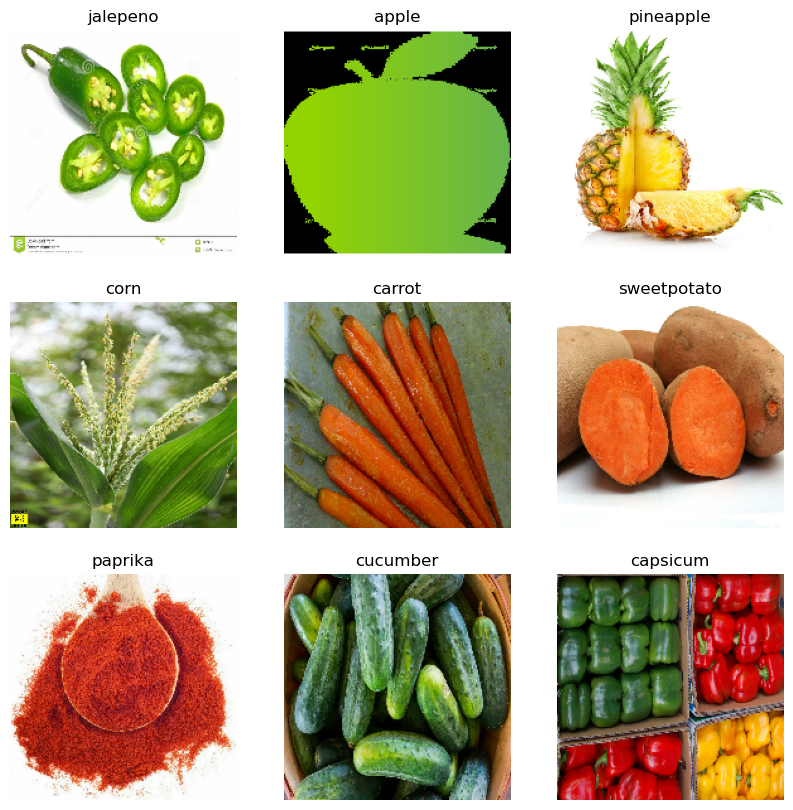

In [12]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [17]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 55s 521ms/step - accuracy: 0.0615 - loss: 4.0499 - val_accuracy: 0.2365 - val_loss: 2.6060
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 387ms/step - accuracy: 0.2244 - loss: 2.6589 - val_accuracy: 0.5128 - val_loss: 1.7790
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 383ms/step - accuracy: 0.3652 - loss: 2.1744 - val_accuracy: 0.7123 - val_loss: 1.1894
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 381ms/step - accuracy: 0.5352 - loss: 1.5808 - val_accuracy: 0.8120 - val_loss: 0.8091
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - accuracy: 0.7022 - loss: 1.0477 - val_accuracy: 0.8519 - val_loss: 0.5881
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 457ms/step - accuracy: 0.8088 - loss: 0.6499 - val_accuracy: 0.8946 - val_loss: 0.4699
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 484ms/step - accuracy: 0.9006 - loss: 0.3289 - val_accuracy: 0.9259 - val_loss: 0.4145
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 50s 494ms/step - accuracy: 0.9316 - loss: 0.2494 - val_accu

Text(0.5, 1.0, 'Loss')

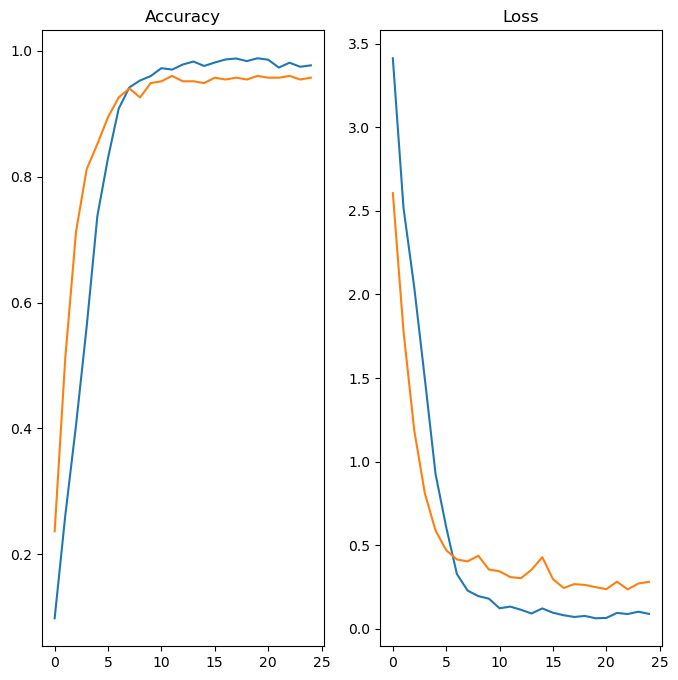

In [18]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [19]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [20]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


In [21]:
score = tf.nn.softmax(predict)

In [22]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is sweetcorn with accuracy of 68.86


In [23]:
model.save('Image_classify.h5')

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import  load_model
import streamlit as st
import numpy as np 

st.header('Image Classification Model')
#model = load_model('C:\Users\mrsay\Desktop\PYTHON_CAP_PROJ\Image_classify.h5')
data_cat = ['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']
img_height = 180
img_width = 180
image =st.text_input('Enter Image name','Apple.jpg')

image_load = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image_load)
img_bat=tf.expand_dims(img_arr,0)

predict = model.predict(img_bat)

score = tf.nn.softmax(predict)
st.image(image, width=200)
st.write('Veg/Fruit in image is ' + data_cat[np.argmax(score)])
st.write('With accuracy of ' + str(np.max(score)*100))
st.run

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


AttributeError: module 'streamlit' has no attribute 'run'

In [26]:
!streamlit run C:\Users\mrsay\anaconda3\Lib\site-packages\ipykernel_launcher.py

Traceback (most recent call last):
  File "C:\Users\mrsay\anaconda3\Scripts\streamlit-script.py", line 6, in <module>
    from streamlit.cli import main
ModuleNotFoundError: No module named 'streamlit.cli'
